# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset berasal dari Kaggle dengan judul "Weather Type Classification"


# **2. Import Library**

In [5]:
import kagglehub
import numpy as np
import pandas as pd
import kagglehub
import os
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings

# **3. Memuat Dataset**

In [6]:
path = kagglehub.dataset_download("nikhil7280/weather-type-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'weather-type-classification' dataset.
Path to dataset files: /kaggle/input/weather-type-classification


In [8]:
csv_file = os.path.join(path, "weather_classification_data.csv")
df = pd.read_csv(csv_file)
{df.shape}

{(13200, 11)}

In [39]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [12]:
df.describe(include='all')

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
count,13200.000000,13200.000000,13200.000000,13200.000000,13200,13200.000000,13200.000000,13200,13200.000000,13200,13200
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,4,NaN,3,4
top,NaN,NaN,NaN,NaN,overcast,NaN,NaN,Winter,NaN,inland,Rainy
freq,NaN,NaN,NaN,NaN,6090,NaN,NaN,5610,NaN,4816,3300
mean,19.127576,68.710833,9.832197,53.644394,NaN,1005.827896,4.005758,NaN,5.462917,NaN,NaN
std,17.386327,20.194248,6.908704,31.946541,NaN,37.199589,3.856600,NaN,3.371499,NaN,NaN
min,-25.000000,20.000000,0.000000,0.000000,NaN,800.120000,0.000000,NaN,0.000000,NaN,NaN
25%,4.000000,57.000000,5.000000,19.000000,NaN,994.800000,1.000000,NaN,3.000000,NaN,NaN
50%,21.000000,70.000000,9.000000,58.000000,NaN,1007.650000,3.000000,NaN,5.000000,NaN,NaN
75%,31.000000,84.000000,13.500000,82.000000,NaN,1016.772500,7.000000,NaN,7.500000,NaN,NaN


In [13]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


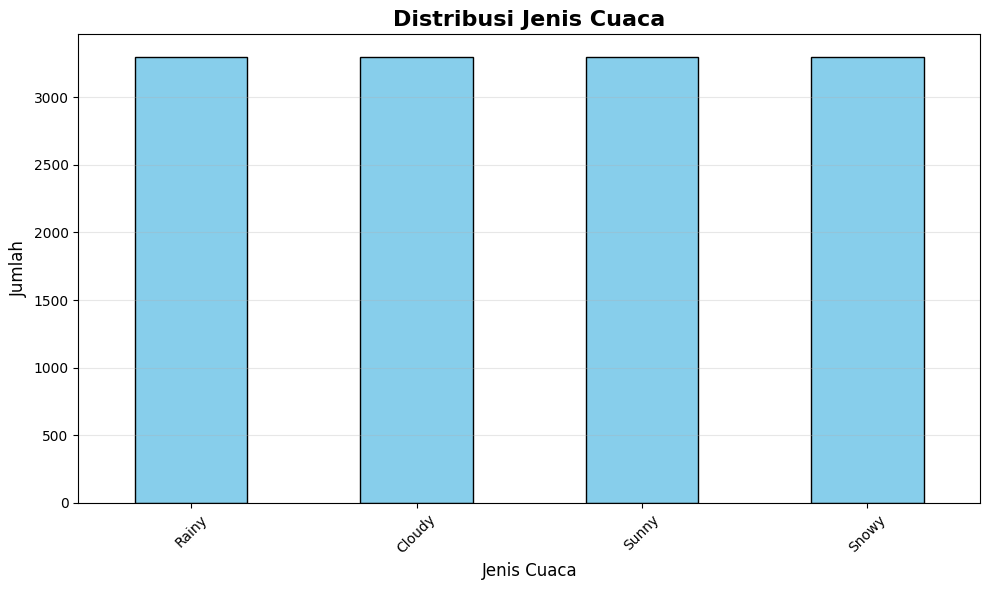

In [18]:
plt.figure(figsize=(10, 6))
df['Weather Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Jenis Cuaca', fontsize=16, fontweight='bold')
plt.xlabel('Jenis Cuaca', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Kolom Numerik: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']



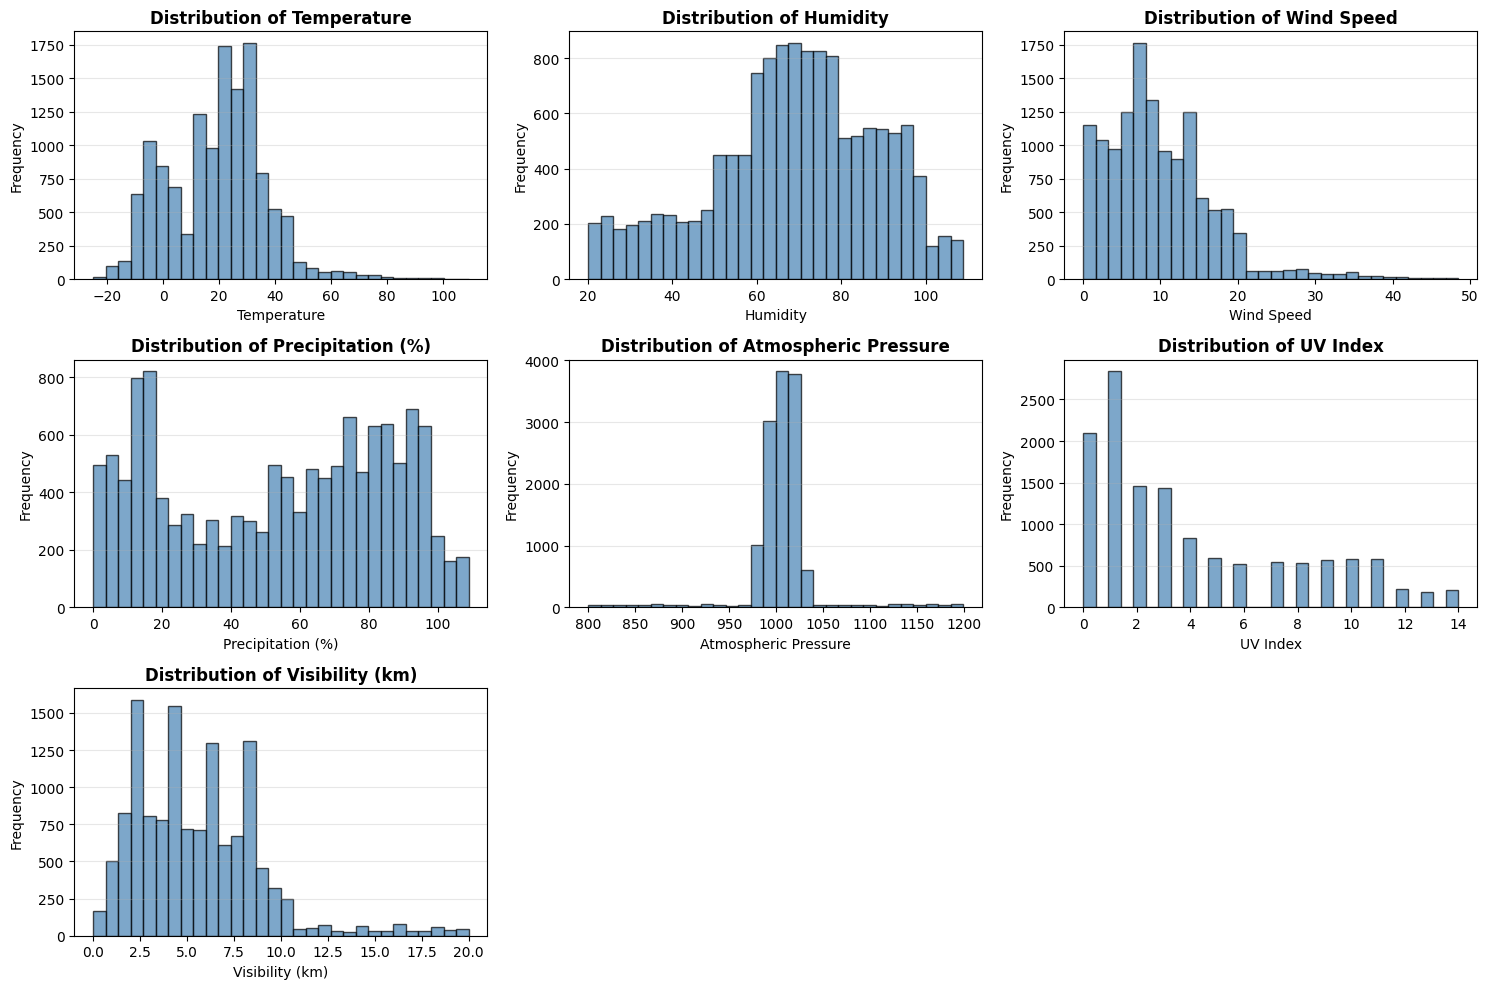

In [42]:
df_numerik = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(f"\nKolom Numerik: {df_numerik}\n")

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(df_numerik):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)

for idx in range(len(df_numerik), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

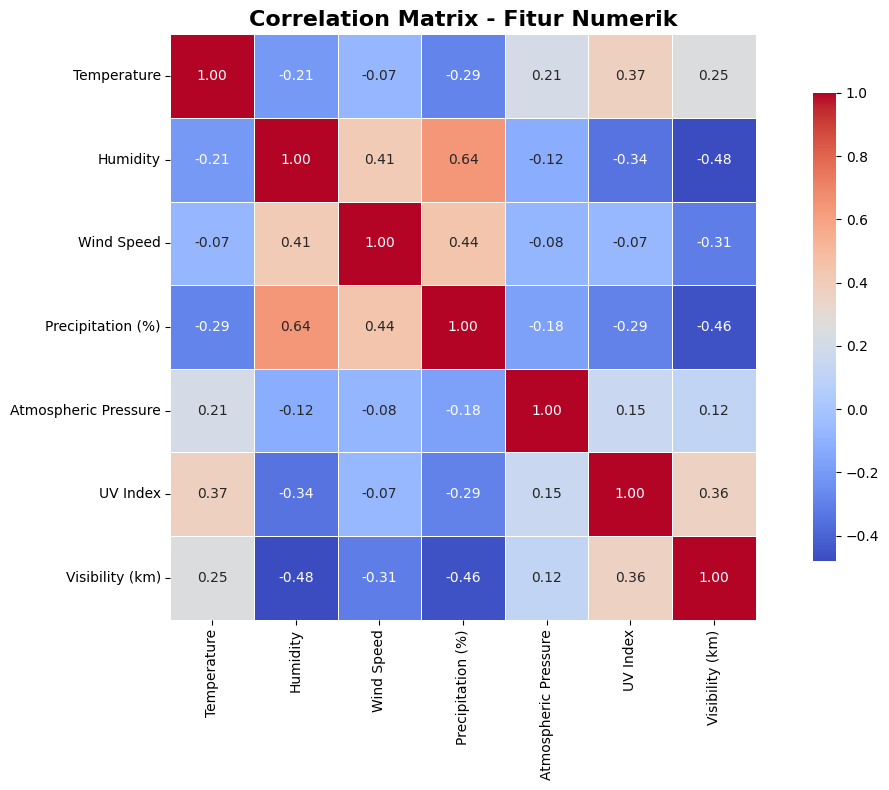

In [30]:
plt.figure(figsize=(12, 8))
correlation = df[df_numerik].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Fitur Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

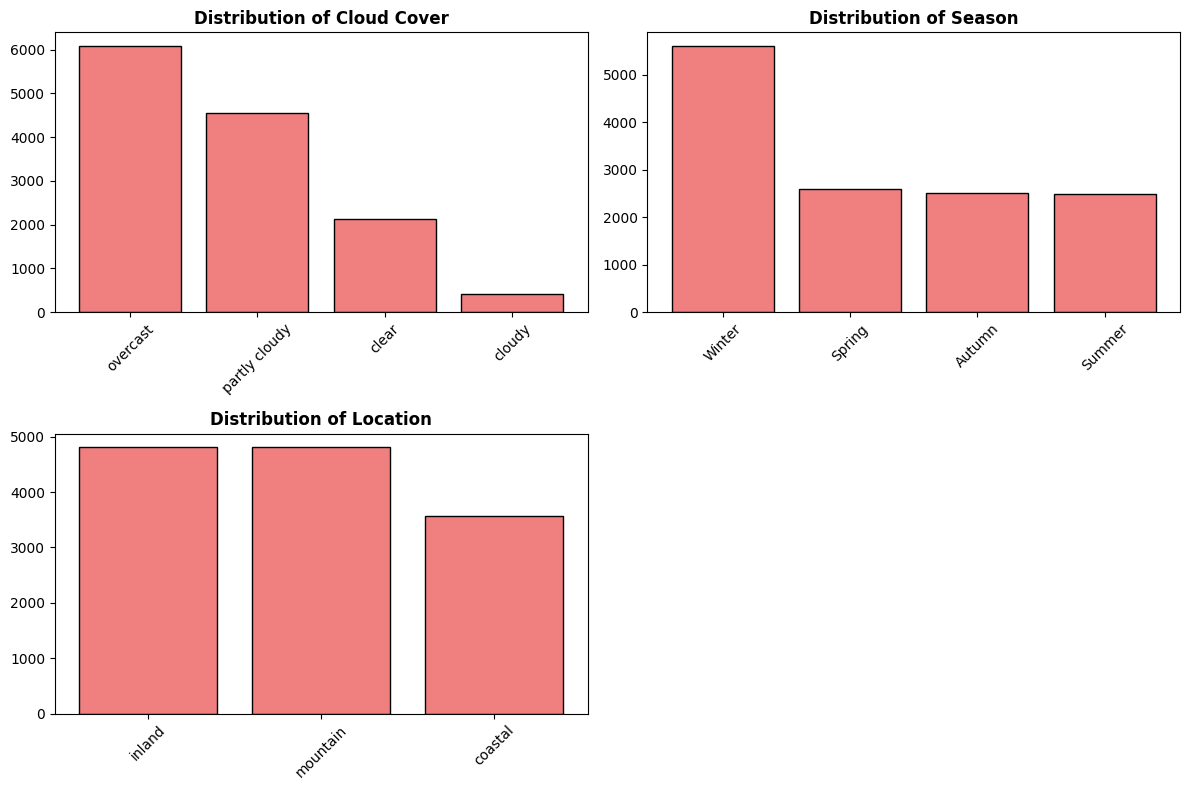

In [41]:
df_kategorik = df.select_dtypes(include=['object']).columns.tolist()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for idx, col in enumerate(df_kategorik):
    if col != 'Weather Type':
        if idx < len(axes):
            axes[idx].bar(df[col].value_counts().index, df[col].value_counts().values, color='lightcoral', edgecolor='black')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[idx].tick_params(axis='x', rotation=45)

for idx in range(len([c for c in df_kategorik if c != 'Weather Type']), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [14]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [15]:
df.duplicated().sum()

np.int64(0)

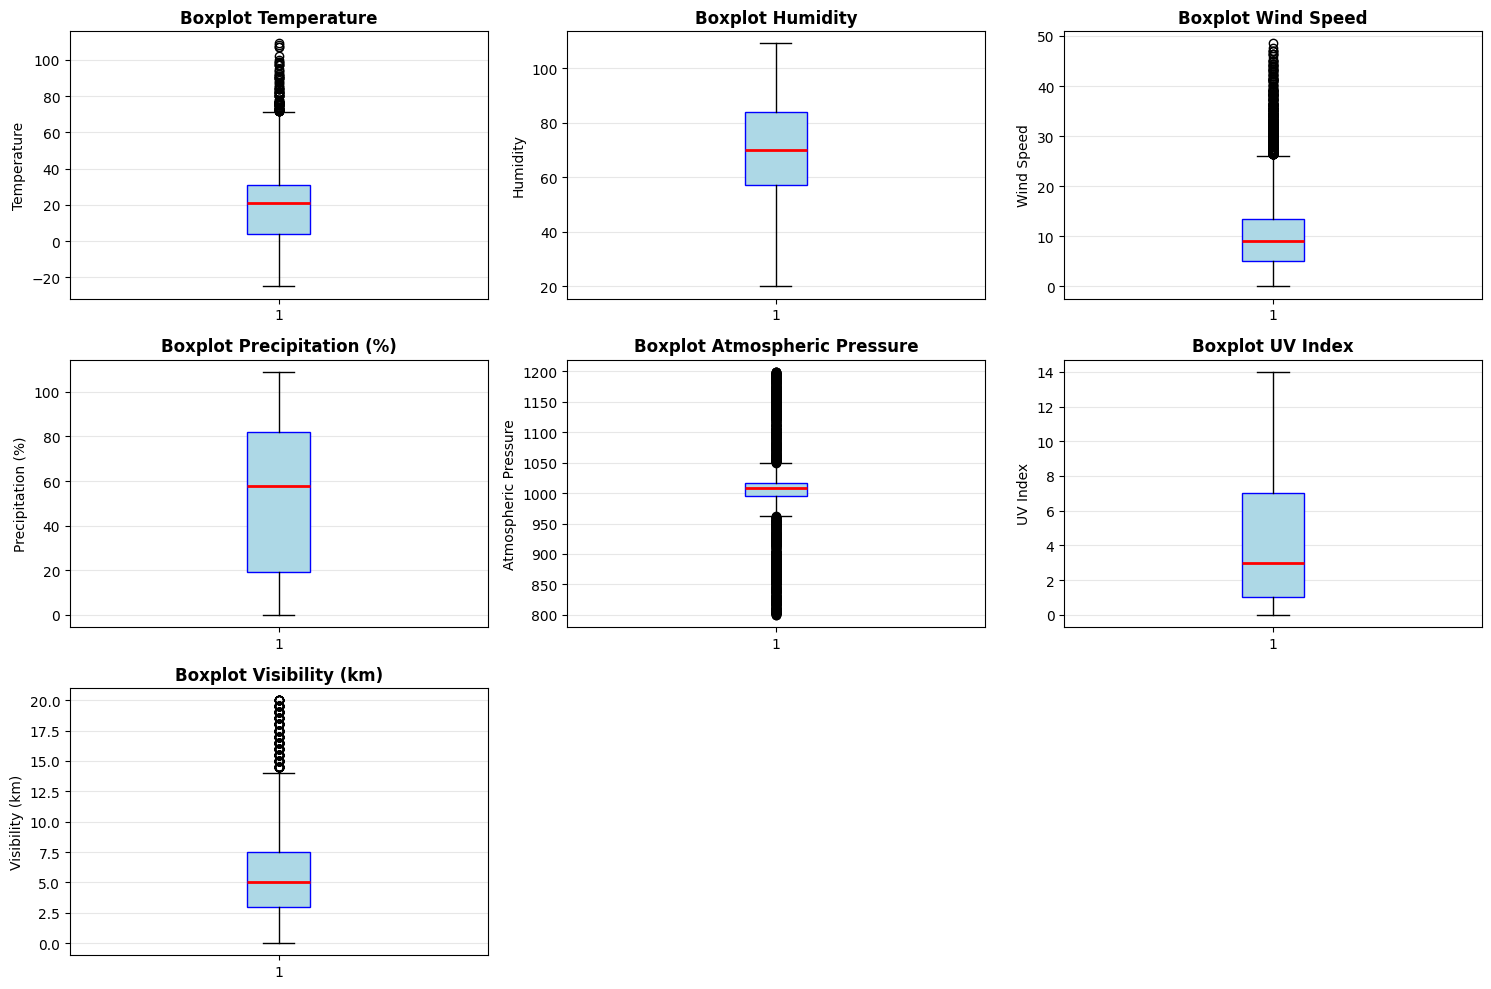

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(df_numerik):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='blue'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Boxplot {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(len(df_numerik), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

In [59]:
def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = cleaned_df.shape[0]
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
        after = cleaned_df.shape[0]
        print(f"Menghapus {before - after} outliers dari '{col}'")
    return cleaned_df


cleaned_df = remove_outliers_iqr(df, df_numerik)

Menghapus 92 outliers dari 'Temperature'
Menghapus 0 outliers dari 'Humidity'
Menghapus 396 outliers dari 'Wind Speed'
Menghapus 0 outliers dari 'Precipitation (%)'
Menghapus 927 outliers dari 'Atmospheric Pressure'
Menghapus 112 outliers dari 'UV Index'
Menghapus 87 outliers dari 'Visibility (km)'


In [38]:
cleaned_df['Weather Type'].value_counts()

,count
Weather Type,
Cloudy,2960
Sunny,2941
Snowy,2875
Rainy,2810


In [61]:
columns_to_drop = ['Season', 'Visibility (km)', 'Location']
preprocessed_df = cleaned_df.drop(columns=columns_to_drop)
print(f"Kolom setelah melakukan dropping:\n \n{list(preprocessed_df.columns)}")

Kolom setelah melakukan dropping:
 
['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Weather Type']


In [48]:
X = preprocessed_df.drop(columns=['Weather Type'])
y = preprocessed_df['Weather Type']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (11586, 7)
Target shape: (11586,)


In [49]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"Categorical features for encoding: {categorical_features}")
print(f"Numerical features for scaling: {numerical_features}")

Categorical features for encoding: ['Cloud Cover']
Numerical features for scaling: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index']


In [62]:
X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features)
print(f"Shape setelah encoding: {X_encoded.shape}")

Shape setelah encoding: (11586, 10)


In [51]:
scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

print(f"Final features shape: {X_scaled.shape}")

Final features shape: (11586, 10)


In [63]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Target shape setelah encoding: {y_encoded.shape}")
print(f"Target classes: {label_encoder.classes_}")

Target shape setelah encoding: (11586,)
Target classes: ['Cloudy' 'Rainy' 'Snowy' 'Sunny']


In [55]:
final_processed_df = X_scaled.copy()
final_processed_df['Weather Type Encoded'] = y_encoded
final_processed_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Cloud Cover_clear,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Weather Type Encoded
0,-0.319763,0.187087,0.056064,0.947157,0.352752,-0.437048,False,False,False,True,1
1,1.258619,1.373706,-0.122803,0.603257,0.399940,0.999527,False,False,False,True,0
2,0.690401,-0.277242,-0.391103,-1.116244,0.963881,0.424897,True,False,False,False,3
3,1.195484,0.703008,-1.374870,0.947157,1.546388,0.999527,True,False,False,False,3
4,0.500995,0.238679,1.397564,0.446939,-1.206015,-0.724363,False,False,True,False,1


In [56]:
final_processed_df.shape

(11586, 11)

In [58]:
final_processed_df.to_csv('final_weather_data.csv', index=False)
